<a href="https://colab.research.google.com/github/Bruno-Moreno/Tesis/blob/main/experiments/dataset_and_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Sklearn functions
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

#Keras functions
import tensorflow as tf
import keras

## Binary Classification Dataset

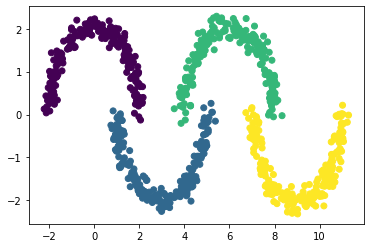

In [ ]:
def make_many_moons(
    number_of_moons,
    sigma, 
    radius, 
    number_of_datapoints,
    y_shift = 0.3
):
    
    moons = []
    for y in range(number_of_moons):
        q = np.random.uniform(0,np.pi,size=number_of_datapoints)
        
        if y % 2 == 0:
            factor = 1
        else: 
            factor = -1
        
        moon = np.zeros((number_of_datapoints, 3))
        moon[:,0] = (radius * np.cos(q)) + 3*y
        moon[:,1] = (radius * np.sin(q) * factor) + (factor == -1) * y_shift
        moon[:,2] = y
        moons.append(moon)
        noise = np.random.normal(0, sigma, size=moon[:,:2].shape)
        moon[:,:2] += noise
    moons = np.concatenate(moons)

    return moons[:,:2], moons[:,2]


number_of_datapoints = 200

X, y = make_many_moons(
    number_of_moons=4,
    sigma=0.15, 
    radius=2, 
    number_of_datapoints=number_of_datapoints,
    y_shift = 0 )


plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
def remove_points(X):

  #Remove some points of one of the classes
  train = pd.DataFrame(X)
  train["y"] = y 

  #Removing values 1
  remove_n = int(0.8*number_of_datapoints)
  drop_indices = np.random.choice(train.loc[train.y == 0 , :].index, remove_n, replace=False)
  df_subset = train.drop(drop_indices, axis = 0)

  #Removing values 2
  remove_n = int(0.2*number_of_datapoints)
  drop_indices = np.random.choice(df_subset.loc[df_subset.y == 1 , :].index, remove_n, replace=False)
  df_subset_2 = df_subset.drop(drop_indices, axis = 0)
  print(df_subset_2.y.value_counts())

  df = df_subset_2.copy()

  #Now we make two of the colors the same
  df["y"] = np.where((df_subset_2["y"].values == 0) | (df_subset_2["y"].values == 1), 0, 1)

  fig = plt.scatter(df[0], df[1], c=df["y"])
  plt.legend(handles=fig.legend_elements()[0], labels=["0" , "1"], title="Clase")
  print(df.y.value_counts())

  return df

2.0    200
3.0    200
1.0    160
0.0     40
Name: y, dtype: int64
1    400
0    200
Name: y, dtype: int64


,0,1,y
0,1.716272,0.562706,0
6,-1.813826,0.363162,0
10,1.023752,1.657238,0
14,-1.102850,1.539187,0
18,-1.691690,1.020216,0
...,...,...,...
795,10.407545,-1.306243,1
796,8.183895,-1.679724,1
797,9.843254,-1.858293,1
798,8.635584,-1.963203,1


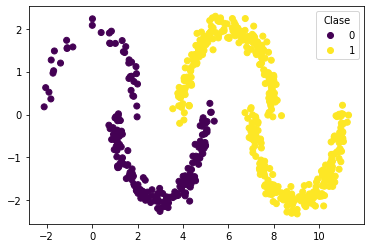

In [ ]:
df = remove_points(X)
df

## Fashion MNIST Dataset

In [ ]:
def dataset(name):
  if name == "FASHION_MNIST":

    fashion_mnist = keras.datasets.fashion_mnist
    (X_train_full,y_train_full) , (X_test , y_test) = fashion_mnist.load_data()

    X_val , X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
    y_val , y_train =  y_train_full[:5000]  , y_train_full[5000:] 

    print(f'Train Shape: {X_train.shape}')
    print(f'Val Shape: {X_val.shape}')
    print(f'Test Shape: {X_test.shape}')

    return X_train , y_train , X_val, y_val , X_test , y_test

  elif name == "MNIST":

    mnist = keras.datasets.mnist
    (X_train_full,y_train_full) , (X_test , y_test) = mnist.load_data()

    X_val , X_train =  X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
    y_val , y_train =  y_train_full[:5000]  , y_train_full[5000:] 

    print(f'Train Shape: {X_train.shape}')
    print(f'Val Shape: {X_val.shape}')
    print(f'Test Shape: {X_test.shape}')

    return X_train , y_train , X_val, y_val , X_test , y_test

  else: 
    print("Error")

X_train , y_train , X_val, y_val , X_test , y_test = dataset("FASHION_MNIST")

Train Shape: (55000, 28, 28)
Val Shape: (5000, 28, 28)
Test Shape: (10000, 28, 28)


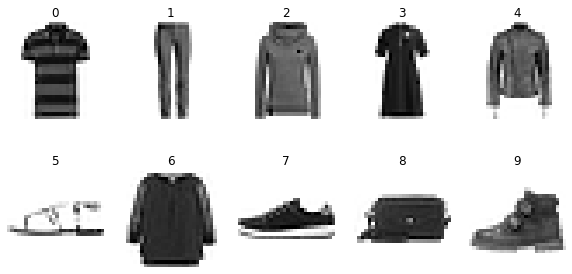

In [ ]:
def plot_images(examples):
  fig, axs = plt.subplots(2, 5 , figsize = (10 , 5))
  count = 0
  for i in range(2):
    for j in range(5):
      axs[i,j].imshow(examples[count].reshape((28,28)) , cmap = "binary")
      axs[i,j].set_axis_off()
      axs[i,j].set_title(f'{count}')
      count += 1
      
def get_examples(X , y):
  X = pd.DataFrame(X.reshape(len(X) , 28*28))
  y = pd.DataFrame(y , columns = ["label"])
  labels = sorted(y.label.unique())

  examples = []
  for label in labels:    
    class_example = X[y.label == label].sample(1).values.reshape(28*28)
    examples.append(class_example)

  return examples

examples_different_classes = get_examples(X_train , y_train)
plot_images(examples_different_classes)

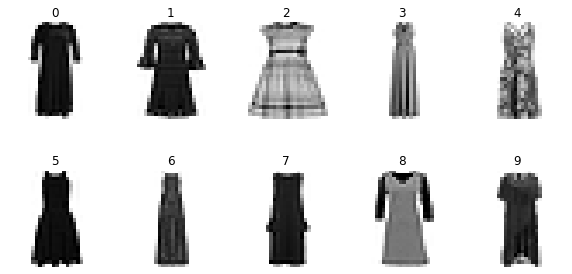

In [ ]:
def get_examples_class(X , y, label):
  X = pd.DataFrame(X.reshape(len(X) , 28*28))
  y = pd.DataFrame(y , columns = ["label"])
  labels = sorted(y.label.unique())

  examples = []
  for _ in range(10):    
    class_example = X[y.label == label].sample(1).values.reshape(28*28)
    examples.append(class_example)

  return examples

examples_same_class = get_examples_class(X_train , y_train, label = 3)
plot_images(examples_same_class)

In [ ]:
def get_samples_train(X, y , clase):
  data = pd.DataFrame(X.reshape((len(X), 28*28)))
  data["y"] = y
  if clase < 4:
    samples = data.loc[data.y == clase, :].sample(2500, random_state = 666)
  elif clase < 7:
    samples = data.loc[data.y == clase, :].sample(1500, random_state = 666)
  else:
    samples = data.loc[data.y == clase, :].sample(500, random_state = 666)

  return list(samples.index)

In [ ]:
samples_list = []
for i in range(10):
  samples_list += get_samples_train(X_train, y_train, i)
  
train = pd.DataFrame(X_train.reshape((len(X_train), 28*28)))
train_modified = train.loc[samples_list, :]
train_modified

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3108,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.533333,0.517647,0.654902,0.000000,0.00000,0.007843,0.000000,0.000000,0.000000,0.0
13300,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.0,0.0,0.000000,...,0.352941,0.313725,0.372549,0.000000,0.00000,0.007843,0.000000,0.000000,0.000000,0.0
42129,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.364706,...,0.447059,0.533333,0.603922,0.329412,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
47737,0.0,0.0,0.0,0.007843,0.0,0.000000,0.0,0.0,0.0,0.070588,...,0.796078,0.815686,0.505882,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
47188,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.027451,...,0.070588,0.023529,0.070588,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28327,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
2998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
42961,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
18168,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.003922,...,0.000000,0.003922,0.000000,0.458824,0.72549,0.662745,0.607843,0.584314,0.164706,0.0


In [ ]:
pd.Series(y_train[samples_list]).value_counts()

0    2500
1    2500
2    2500
3    2500
4    1500
5    1500
6    1500
7     500
8     500
9     500
dtype: int64

In [ ]:
def get_samples_val(X, y , clase):
  data = pd.DataFrame(X.reshape((len(X), 28*28)))
  data["y"] = y
  if clase < 4:
    samples = data.loc[data.y == clase, :].sample(250, random_state = 666)
  elif clase < 7:
    samples = data.loc[data.y == clase, :].sample(150, random_state = 666)
  else:
    samples = data.loc[data.y == clase, :].sample(50, random_state = 666)

  return list(samples.index)

lista = get_samples_val(X_val, y_val, 8)

In [ ]:
samples_list = []
for i in range(10):
  samples_list += get_samples_val(X_val, y_val, i)
  
val = pd.DataFrame(X_val.reshape((len(X_val), 28*28)))
val_modified = val.loc[samples_list, :]
val_modified

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3050,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.000000,0.000000,...,0.709804,0.725490,0.800000,0.227451,0.000000,0.007843,0.000000,0.000000,0.0,0.0
4407,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.156863,0.129412,0.066667,0.011765,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2307,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.466667,...,0.364706,0.337255,0.258824,0.109804,0.000000,0.000000,0.000000,0.000000,0.0,0.0
791,0.0,0.0,0.0,0.0,0.000000,0.0,0.003922,0.0,0.019608,0.207843,...,0.615686,0.603922,0.313725,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3865,0.0,0.0,0.0,0.0,0.003922,0.0,0.000000,0.0,0.000000,0.160784,...,0.643137,0.694118,0.639216,0.000000,0.000000,0.003922,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4490,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4827,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3096,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.027451,0.592157,0.517647,0.462745,0.447059,0.458824,0.192157,0.0,0.0
932,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
pd.Series(y_val[samples_list]).value_counts()

0    250
1    250
2    250
3    250
4    150
5    150
6    150
7     50
8     50
9     50
dtype: int64

In [ ]:
X_val = val_modified.to_numpy().reshape((-1,28,28))
y_val = y_val[samples_list]
X_val.shape

(1600, 28, 28)

# Binary Classification

In [ ]:
!pip install -U pydpp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydpp.dpp import DPP

In [ ]:
df

,0,1,y
0,-0.156879,2.104207,0
15,0.906395,1.841415,0
29,0.366230,2.083129,0
33,-0.725257,2.094539,0
37,-0.708444,1.860185,0
...,...,...,...
795,9.379365,-1.959637,1
796,9.016403,-2.194559,1
797,7.622330,-1.463517,1
798,10.262171,-1.440041,1


In [ ]:
df = df.reset_index()
datos = df.drop(columns = ["y"])
label = df["y"]

In [ ]:
batch_size = 32
dpp = DPP(datos)
dpp.compute_kernel(kernel_type = 'rbf', sigma = 1000)
keys_DPP = dpp.sample_k(batch_size) 
keys_DPP

array([  0,   1,   3,  16,  17,  26,  27,  38,  43,  59,  92, 103, 112,
       186, 189, 204, 234, 281, 306, 319, 366, 375, 439, 463, 492, 501,
       546, 559, 571, 589, 594, 596])

Clase 0: 15
Clase 1: 17


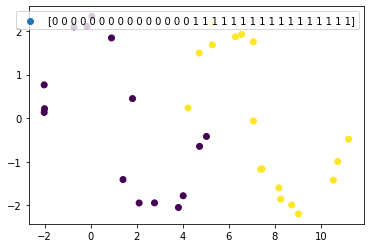

In [ ]:
plt.scatter(df.loc[keys_DPP,0], df.loc[keys_DPP,1], c=df.loc[keys_DPP, "y" ])
plt.legend()
print(f'Clase 0: {df.loc[keys_DPP, "y" ].value_counts()[0]}')
print(f'Clase 1: {df.loc[keys_DPP, "y" ].value_counts()[1]}')

In [ ]:
batch_size = 32
keys_uniform = np.random.randint(df.shape[0], size=batch_size)
keys_uniform

array([570,  23,  58, 234, 347, 427,  75,  21, 348, 207, 318, 251, 451,
       142,  55,   2, 292, 580, 558, 376, 375, 190, 287, 257, 248,  88,
       256, 163, 156, 124,  27, 438])

Clase 0: 13
Clase 1: 19


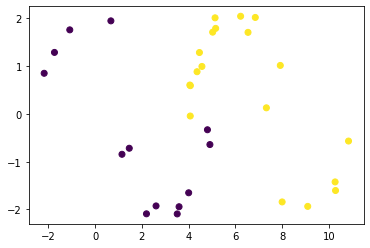

In [ ]:
plt.scatter(df.loc[keys_uniform,0], df.loc[keys_uniform,1], c=df.loc[keys_uniform, "y" ])
print(f'Clase 0: {df.loc[keys_uniform, "y" ].value_counts()[0]}')
print(f'Clase 1: {df.loc[keys_uniform, "y" ].value_counts()[1]}')

In [ ]:
%%time 

def sample_both_methods(batch_size):

  keys_uniform = np.random.randint(df.shape[0], size=batch_size)

  clase_0_uniform = df.loc[keys_uniform, "y" ].value_counts()[0]
  clase_1_uniform = df.loc[keys_uniform, "y" ].value_counts()[1]

  #DPP
  dpp = DPP(datos)
  dpp.compute_kernel(kernel_type = 'rbf', sigma = 1000)
  try:
    keys_DPP = dpp.sample_k(batch_size) 
  except:
    keys_DPP = dpp.sample_k(batch_size) 

  clase_0_DPP = df.loc[keys_DPP, "y" ].value_counts()[0]
  clase_1_DPP = df.loc[keys_DPP, "y" ].value_counts()[1]

  return clase_0_uniform, clase_1_uniform, clase_0_DPP, clase_1_DPP

sample_both_methods(batch_size = 32)


CPU times: user 656 ms, sys: 351 ms, total: 1.01 s
Wall time: 527 ms


(9, 23, 16, 16)

In [ ]:
def sample_n_times(batch_size, n):

  results_uniform = pd.DataFrame()
  results_DPP = pd.DataFrame()

  clase_0_uniform_list = []
  clase_1_uniform_list = []
  clase_0_DPP_list = []
  clase_1_DPP_list = []

  for _ in range(n):

    clase_0_uniform, clase_1_uniform, clase_0_DPP, clase_1_DPP = sample_both_methods(batch_size)

    clase_0_uniform_list.append(clase_0_uniform/batch_size)
    clase_1_uniform_list.append(clase_1_uniform/batch_size)
    clase_0_DPP_list.append(clase_0_DPP/batch_size)
    clase_1_DPP_list.append(clase_1_DPP/batch_size)

  results_uniform['Uniform_0'] = clase_0_uniform_list
  results_uniform['Uniform_1'] = clase_1_uniform_list
  results_DPP['DPP_0'] = clase_0_DPP_list
  results_DPP['DPP_1'] = clase_1_DPP_list

  return results_uniform, results_DPP

n = 100
batch_size = 32

results_uniform, results_DPP = sample_n_times(batch_size, n)
results_uniform, results_DPP




(    Uniform_0  Uniform_1
 0     0.34375    0.65625
 1     0.43750    0.56250
 2     0.28125    0.71875
 3     0.37500    0.62500
 4     0.40625    0.59375
 ..        ...        ...
 95    0.40625    0.59375
 96    0.31250    0.68750
 97    0.21875    0.78125
 98    0.21875    0.78125
 99    0.28125    0.71875
 
 [100 rows x 2 columns],       DPP_0    DPP_1
 0   0.43750  0.56250
 1   0.40625  0.59375
 2   0.43750  0.56250
 3   0.43750  0.56250
 4   0.40625  0.59375
 ..      ...      ...
 95  0.50000  0.50000
 96  0.50000  0.50000
 97  0.46875  0.53125
 98  0.50000  0.50000
 99  0.40625  0.59375
 
 [100 rows x 2 columns])

In [ ]:
uniform_values = results_uniform.mean(axis = 0)
uniform_values_error = results_uniform.std(axis = 0)

DPP_values = results_DPP.mean(axis = 0)
DPP_values_error = results_DPP.std(axis = 0)


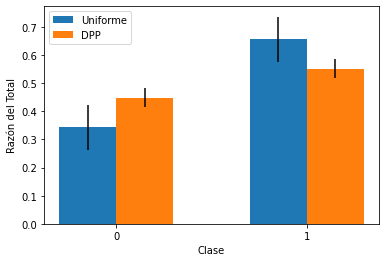

In [ ]:
X = ['0', '1']
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.15, uniform_values, 0.3, label = 'Uniforme' , yerr=uniform_values_error)
plt.bar(X_axis + 0.15, DPP_values, 0.3, label = 'DPP' , yerr=DPP_values_error)
plt.xlabel("Clase")
plt.ylabel("Razón del Total")
plt.xticks(X_axis, X)
plt.legend()

# Multiclass Classification 

In [ ]:
!pip install dppy
!pip install umap-learn
!pip install -U pydpp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time 

def progress_bar(part, total, length = 30):
  frac = part/total
  completed = int(frac * length)
  missing = length - completed
  bar = f"[{ '#' * completed }{'-'*missing}]{frac:.2%}"

  return bar

In [ ]:
# Import other libaries
import tensorflow as tf
import keras
from keras.models import Sequential , Model
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Lambda
from keras.layers import BatchNormalization
from IPython.display import display, clear_output

import random

# Import other libaries
import tensorflow as tf
import keras
from datetime import datetime
from packaging import version
from keras.models import Sequential , Model
from keras import backend as K
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Reshape
from keras.layers import Lambda
from keras.layers import BatchNormalization
from IPython.display import display, clear_output

#Import DPP libraries
from pydpp.dpp import DPP
from sklearn.gaussian_process.kernels import PairwiseKernel

#Functions
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE


from numba import jit

from umap import UMAP

## OneShot

In [ ]:
num_classes = 10
epochs = 10

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)


def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1.0, 0.0]
    return np.array(pairs), np.array(labels)


def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    #x = Dense(128, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    x = Lambda(lambda  x: K.l2_normalize(x,axis=1))(x)
    return Model(input, x)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]

tr_pairs, tr_y = create_pairs(X_train, digit_indices)
digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(X_test, digit_indices)

Epoch 1/10
851/851 [==============================] - 6s 5ms/step - loss: 0.0941 - accuracy: 0.8772 - val_loss: 0.0817 - val_accuracy: 0.8912
Epoch 2/10
851/851 [==============================] - 6s 7ms/step - loss: 0.0726 - accuracy: 0.9070 - val_loss: 0.0730 - val_accuracy: 0.9069
Epoch 3/10
851/851 [==============================] - 7s 8ms/step - loss: 0.0658 - accuracy: 0.9150 - val_loss: 0.0682 - val_accuracy: 0.9103
Epoch 4/10
851/851 [==============================] - 6s 8ms/step - loss: 0.0612 - accuracy: 0.9202 - val_loss: 0.0678 - val_accuracy: 0.9096
Epoch 5/10
851/851 [==============================] - 7s 9ms/step - loss: 0.0587 - accuracy: 0.9233 - val_loss: 0.0672 - val_accuracy: 0.9105
Epoch 6/10
851/851 [==============================] - 7s 9ms/step - loss: 0.0567 - accuracy: 0.9257 - val_loss: 0.0705 - val_accuracy: 0.9019
Epoch 7/10
851/851 [==============================] - 7s 8ms/step - loss: 0.0548 - accuracy: 0.9276 - val_loss: 0.0688 - val_accuracy: 0.9047
Epoch 

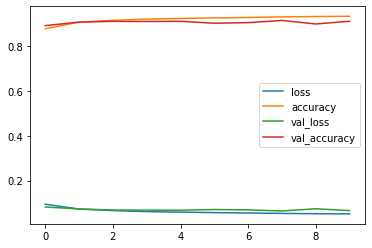

In [ ]:
input_shape = X_train.shape[1:]

# network definition
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)

model.compile(loss=contrastive_loss, optimizer="rmsprop", metrics=[accuracy])
# train
history = model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

pd.DataFrame(history.history).plot()

In [ ]:
# compute final accuracy on training and test sets
y_pred_tr = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
tr_acc = compute_accuracy(tr_y, y_pred_tr)
y_pred_te = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
te_acc = compute_accuracy(te_y, y_pred_te)

print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

625/625 [==============================] - 1s 2ms/step
* Accuracy on training set: 93.44%
* Accuracy on test set: 91.03%


50/50 [==============================] - 0s 1ms/step


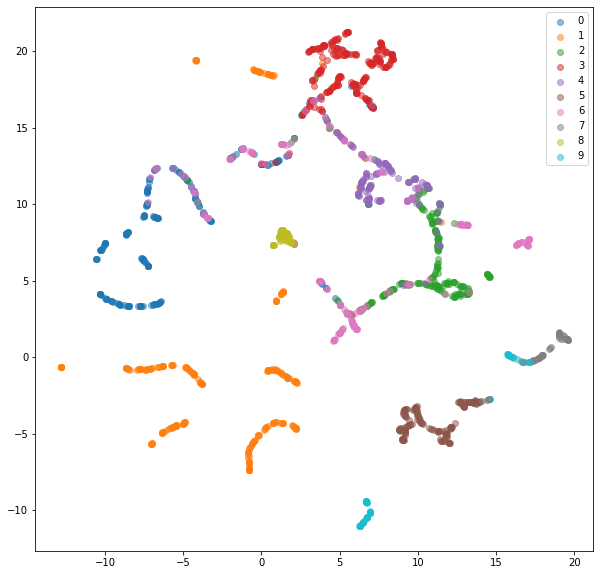

In [ ]:
embeddings_oneshot = base_network.predict(X_val)

trans = UMAP(n_neighbors=5, random_state=666).fit(embeddings_oneshot)

mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

plt.figure(figsize=(10,10))
for i in range(10):
    inds = np.where(y_val==i)[0]
    plt.scatter(trans.embedding_[inds, 0], trans.embedding_[inds, 1], alpha=0.5, color=colors[i])
    
plt.legend(mnist_classes)

In [ ]:
embeddings_oneshot.shape

(1600, 16)

## AutoEncoder

In [ ]:
def encoder_model(latent_size):
  encoder = Sequential(name='encoder')

  #Encoder
  encoder.add(Flatten(input_shape = [28 , 28]))
  encoder.add(Dense(500, activation = "sigmoid" , kernel_initializer='random_normal'))
  encoder.add(Dropout(0.5))
  encoder.add(Dense(300, activation = "sigmoid" , kernel_initializer='random_normal'))
  encoder.add(Dropout(0.3))
  encoder.add(Dense(100, activation = "sigmoid" , kernel_initializer='random_normal'))
  encoder.add(Dense(latent_size, activation = "tanh" , kernel_initializer='random_normal'))

  encoder.summary()
  #Decoder 
  return encoder 

def decoder_model(latent_size):
  decoder = Sequential(name='decoder')

  #Decoder 
  decoder.add(Dense(100, input_shape = (latent_size , ) , activation = "sigmoid" , kernel_initializer='random_normal'))
  decoder.add(Dropout(0.3))
  decoder.add(Dense(300, activation = "sigmoid" , kernel_initializer='random_normal'))
  decoder.add(Dropout(0.5))
  decoder.add(Dense(500, activation = "sigmoid", kernel_initializer='random_normal'))
  decoder.add(Dense(784, activation = "sigmoid" , kernel_initializer='random_normal'))
  decoder.add(Reshape(target_shape = (28,28)))
  
  return decoder 

In [ ]:
#Creating the models 
latent_size = 16
encoder = encoder_model(latent_size)
decoder = decoder_model(latent_size)

#Joining the models 
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("adam", loss = "binary_crossentropy")

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               150300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 16)                1616

Epoch 1/50
430/430 [==============================] - 3s 5ms/step - loss: 0.4795 - val_loss: -37.2863
Epoch 2/50
430/430 [==============================] - 2s 5ms/step - loss: 0.4155 - val_loss: -36.6973
Epoch 3/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3723 - val_loss: -72.8862
Epoch 4/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3534 - val_loss: -81.1965
Epoch 5/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3484 - val_loss: -86.7581
Epoch 6/50
430/430 [==============================] - 2s 4ms/step - loss: 0.3435 - val_loss: -82.3208
Epoch 7/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3402 - val_loss: -82.4748
Epoch 8/50
430/430 [==============================] - 2s 5ms/step - loss: 0.3378 - val_loss: -81.7601
Epoch 9/50
430/430 [==============================] - 4s 8ms/step - loss: 0.3357 - val_loss: -82.3638
Epoch 10/50
430/430 [==============================] - 2s 4ms/step - loss: 0.3341 

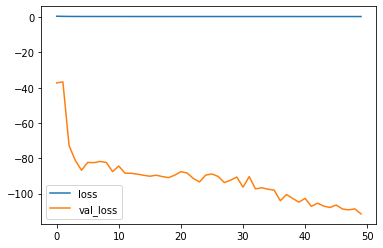

In [ ]:
history = model.fit(X_train , X_train , batch_size = 128 , epochs = 50, validation_data= (X_test, X_test))
pd.DataFrame(history.history).plot()

50/50 [==============================] - 0s 1ms/step


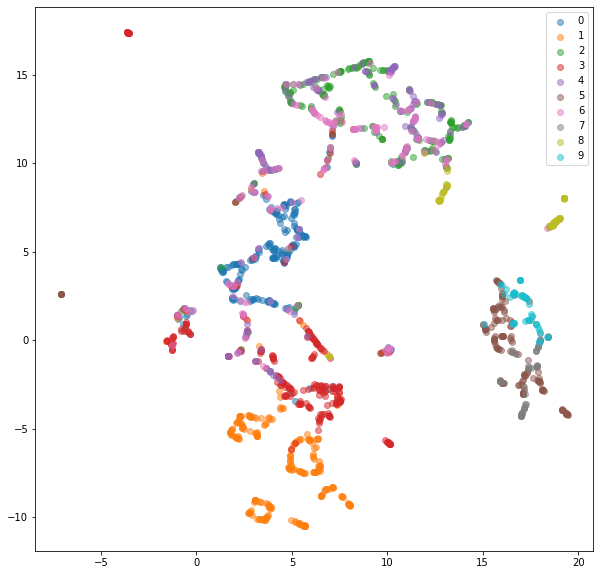

In [ ]:
embeddings_autoencoder = encoder.predict(X_val)

trans = UMAP(n_neighbors=5, random_state=666).fit(embeddings_autoencoder)

mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

plt.figure(figsize=(10,10))
for i in range(10):
    inds = np.where(y_val==i)[0]
    plt.scatter(trans.embedding_[inds, 0], trans.embedding_[inds, 1], alpha=0.5, color=colors[i])
    
plt.legend(mnist_classes)

In [ ]:
embeddings_autoencoder.shape

(1600, 16)

In [ ]:
from scipy.spatial.distance import pdist, squareform
import scipy
from numpy import dot
from numpy.linalg import norm
import numpy as np

def minkowski(X, sigma=0.5, p = 0.5):
	pairwise_dists = squareform(pdist(X, 'minkowski', p=p))
	A = scipy.exp(-pairwise_dists ** 2 / (2. * sigma ** 2))
	return A

In [ ]:
%%time 

def sample_methods(batch_size):

  # Uniform ---------------------------------------------------------------

  keys_uniform = np.random.randint(X_val.shape[0], size=batch_size)
  clase_uniform = pd.Series(y_val[keys_uniform]).value_counts()/ batch_size
  #clase_uniform = pd.Series(y_val[keys_uniform]).value_counts()

  # Euclidean --------------------------------------------------------------

  dpp = DPP(X_val.reshape((-1, 784)))
  dpp.compute_kernel(kernel_type = 'rbf', sigma= 5)                  
  keys_DPP_euclidean = dpp.sample_k(batch_size) 
  clase_DPP_euclidean = pd.Series(y_val[keys_DPP_euclidean]).value_counts()/ batch_size
  #clase_uniform = pd.Series(y_val[keys_uniform]).value_counts()

  # Cosine --------------------------------------------------------------

  dpp = DPP(X_val.reshape((-1, 784)))
  dpp.compute_kernel(kernel_type = 'cos-sim')                  
  keys_DPP_cosine = dpp.sample_k(batch_size) 
  clase_DPP_cosine = pd.Series(y_val[keys_DPP_cosine]).value_counts()/ batch_size

  # DPP OneShot -----------------------------------------------------------

  dpp = DPP(embeddings_oneshot)
  dpp.compute_kernel(kernel_type = 'rbf', sigma= 5)                  
  keys_DPP_oneshot = dpp.sample_k(batch_size)   
  clase_DPP_oneshot = pd.Series(y_val[keys_DPP_oneshot]).value_counts()/ batch_size
  #clase_DPP_oneshot = pd.Series(y_val[keys_DPP_oneshot]).value_counts()

  # DPP AutoEncoder --------------------------------------------------------

  dpp = DPP(embeddings_autoencoder)
  dpp.compute_kernel(kernel_type = 'rbf', sigma= 5)                  
  keys_DPP_autoencoder = dpp.sample_k(batch_size)   
  clase_DPP_autoencoder = pd.Series(y_val[keys_DPP_autoencoder]).value_counts()/ batch_size
  #clase_DPP_autoencoder = pd.Series(y_val[keys_DPP_autoencoder]).value_counts()

  return clase_uniform , clase_DPP_euclidean, clase_DPP_cosine, clase_DPP_oneshot, clase_DPP_autoencoder

batch_size = 100
#sample_methods(batch_size)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.63 µs


In [ ]:
%%time 
def sample_n_times(batch_size, n):

  results_uniform = pd.DataFrame()
  results_uniform.index = list(range(10))

  results_DPP_euclidean = pd.DataFrame()
  results_DPP_euclidean.index = list(range(10))

  results_DPP_cosine = pd.DataFrame()
  results_DPP_cosine.index = list(range(10))

  results_DPP_oneshot = pd.DataFrame()
  results_DPP_oneshot.index = list(range(10))

  results_DPP_autoencoder = pd.DataFrame()
  results_DPP_autoencoder.index = list(range(10))

  for i in range(n):

    try:
      clase_uniform , clase_DPP_euclidean,  clase_DPP_cosine, clase_DPP_oneshot, clase_DPP_autoencoder = sample_methods(batch_size)
    except:
      clase_uniform , clase_DPP_euclidean,  clase_DPP_cosine, clase_DPP_oneshot, clase_DPP_autoencoder = sample_methods(batch_size)

    results_uniform[f'Uniform_{i}'] = clase_uniform
    results_DPP_euclidean[f'DPP_euclidean_{i}'] = clase_DPP_euclidean
    results_DPP_cosine[f'DPP_cosine_{i}'] = clase_DPP_cosine
    results_DPP_oneshot[f'DPP_oneshot_{i}'] = clase_DPP_oneshot
    results_DPP_autoencoder[f'DPP_autoencoder_{i}'] = clase_DPP_autoencoder


    clear_output()
    progress_bar(i, n, length = 30)


  return results_uniform, results_DPP_euclidean, results_DPP_cosine, results_DPP_oneshot, results_DPP_autoencoder

n = 50
batch_size = 100

results_uniform, results_DPP_euclidean, results_DPP_cosine, results_DPP_oneshot, results_DPP_autoencoder = sample_n_times(batch_size, n)
results_uniform, results_DPP_euclidean, results_DPP_cosine, results_DPP_oneshot, results_DPP_autoencoder

CPU times: user 46min 17s, sys: 8min 25s, total: 54min 43s
Wall time: 38min 47s


(   Uniform_0  Uniform_1  Uniform_2  Uniform_3  Uniform_4  Uniform_5  \
 0       0.22       0.20       0.21       0.20       0.20       0.16   
 1       0.09       0.14       0.13       0.16       0.15       0.17   
 2       0.13       0.11       0.11       0.13       0.07       0.16   
 3       0.15       0.17       0.13       0.15       0.16       0.14   
 4       0.11       0.07       0.13       0.07       0.08       0.10   
 5       0.07       0.09       0.15       0.09       0.13       0.09   
 6       0.10       0.08       0.11       0.11       0.08       0.11   
 7       0.03       0.04       0.02       0.05       0.06       0.01   
 8       0.03       0.04        NaN       0.04       0.03        NaN   
 9       0.07       0.06       0.01        NaN       0.04       0.06   
 
    Uniform_6  Uniform_7  Uniform_8  Uniform_9  ...  Uniform_40  Uniform_41  \
 0       0.15       0.12       0.18       0.13  ...        0.20        0.11   
 1       0.12       0.11       0.15       0.18  

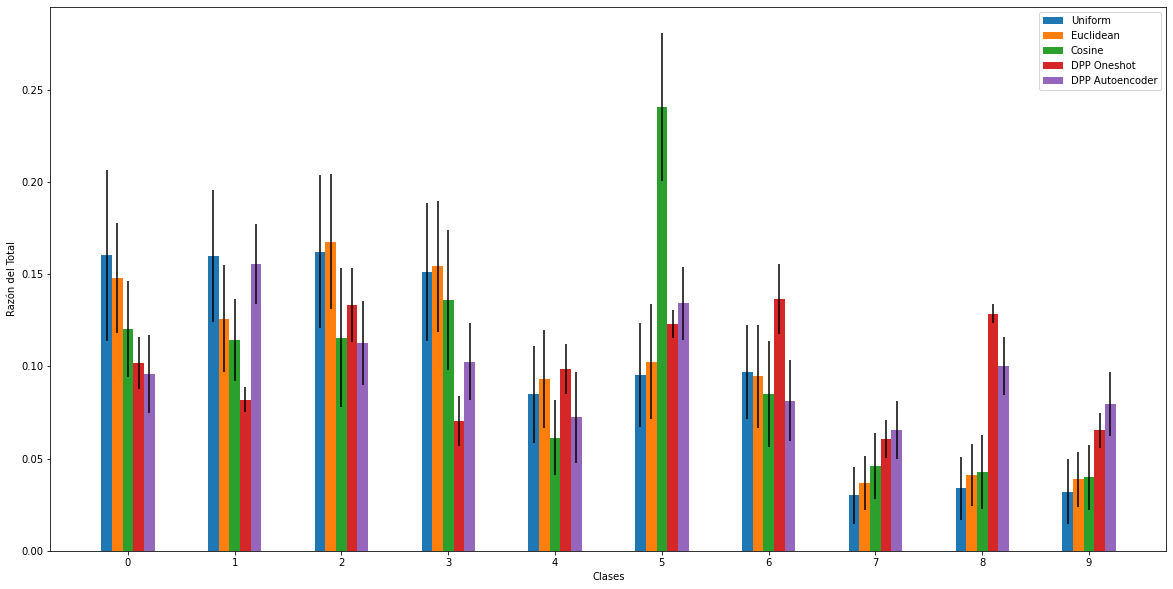

In [ ]:
X = ['0', '1', '2', '3' , '4', '5', '6', '7' , '8' , '9']
uniform = results_uniform.mean(axis = 1)
uniform_error = results_uniform.std(axis = 1)

euclidean = results_DPP_euclidean.mean(axis = 1)
euclidean_error = results_DPP_euclidean.std(axis = 1)

cosine = results_DPP_cosine.mean(axis = 1)
cosine_error = results_DPP_cosine.std(axis = 1)

dpp_oneshot = results_DPP_oneshot.mean(axis = 1)
dpp_oneshot_error = results_DPP_oneshot.std(axis = 1)

dpp_autoencoder = results_DPP_autoencoder.mean(axis = 1)
dpp_autoencoder_error = results_DPP_autoencoder.std(axis = 1)

X_axis = np.arange(len(X))
  
plt.figure(figsize=(20,10)) 
plt.bar(X_axis - 0.2, uniform, 0.1, label = 'Uniform' , yerr=uniform_error)
plt.bar(X_axis - 0.1, euclidean, 0.1, label = 'Euclidean' , yerr=euclidean_error)
plt.bar(X_axis + 0, cosine, 0.1, label = 'Cosine' , yerr=cosine_error)
plt.bar(X_axis + 0.1, dpp_oneshot, 0.1, label = 'DPP Oneshot' , yerr=dpp_oneshot_error)
plt.bar(X_axis + 0.2, dpp_autoencoder, 0.1, label = 'DPP Autoencoder' , yerr=dpp_autoencoder_error)

plt.xticks(X_axis, X)
plt.xlabel("Clases")
plt.ylabel("Razón del Total")
plt.legend()
plt.show()

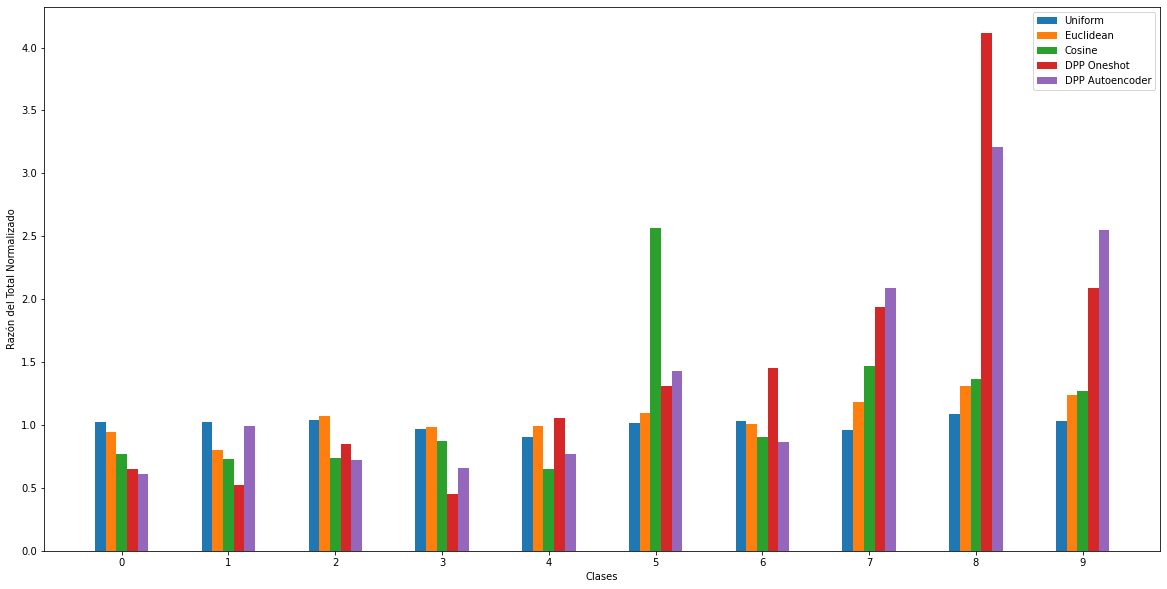

In [ ]:
X = ['0', '1', '2', '3' , '4', '5', '6', '7' , '8' , '9']
uniform = results_uniform.mean(axis = 1) / (pd.Series(y_val).value_counts()/len(y_val)) 

euclidean = results_DPP_euclidean.mean(axis = 1)/ (pd.Series(y_val).value_counts()/len(y_val))

cosine = results_DPP_cosine.mean(axis = 1)/ (pd.Series(y_val).value_counts()/len(y_val))

dpp_oneshot = results_DPP_oneshot.mean(axis = 1)/ (pd.Series(y_val).value_counts()/len(y_val))

dpp_autoencoder = results_DPP_autoencoder.mean(axis = 1) / (pd.Series(y_val).value_counts()/len(y_val))

X_axis = np.arange(len(X))
  
plt.figure(figsize=(20,10)) 
plt.bar(X_axis - 0.2, uniform, 0.1, label = 'Uniform')
plt.bar(X_axis - 0.1, euclidean, 0.1, label = 'Euclidean')
plt.bar(X_axis + 0, cosine, 0.1, label = 'Cosine')
plt.bar(X_axis + 0.1, dpp_oneshot, 0.1, label = 'DPP Oneshot')
plt.bar(X_axis + 0.2, dpp_autoencoder, 0.1, label = 'DPP Autoencoder')

plt.xticks(X_axis, X)
plt.xlabel("Clases")
plt.ylabel("Razón del Total Normalizado")
plt.legend()
plt.show()

In [ ]:
pd.Series(y_val).value_counts()

0    250
1    250
2    250
3    250
4    150
5    150
6    150
7    100
8    100
9    100
dtype: int64

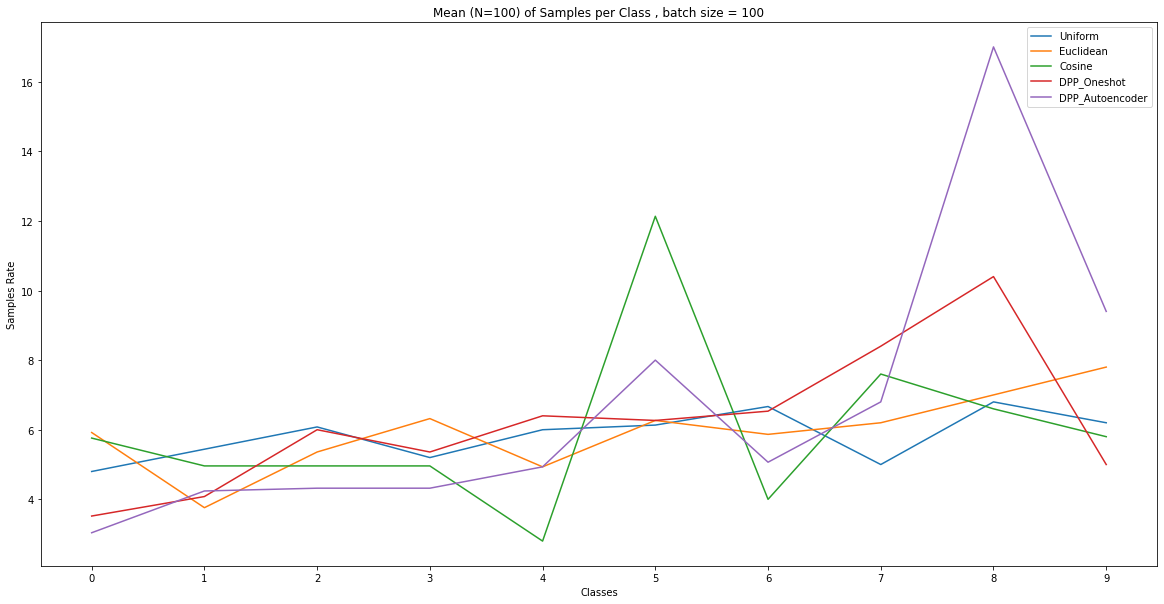

In [ ]:
X = ['0', '1', '2', '3' , '4', '5', '6', '7' , '8' , '9']
uniform = results_uniform.mean(axis = 1)
uniform_error = results_uniform.std(axis = 1)

euclidean = results_DPP_euclidean.mean(axis = 1)
euclidean_error = results_DPP_euclidean.std(axis = 1)

cosine = results_DPP_cosine.mean(axis = 1)
cosine_error = results_DPP_cosine.std(axis = 1)

dpp_oneshot = results_DPP_oneshot.mean(axis = 1)
dpp_oneshot_error = results_DPP_oneshot.std(axis = 1)

dpp_autoencoder = results_DPP_autoencoder.mean(axis = 1)
dpp_autoencoder_error = results_DPP_autoencoder.std(axis = 1)

X_axis = np.arange(len(X))
  
plt.figure(figsize=(20,10)) 
plt.plot(X_axis, uniform, label = "Uniform")
plt.plot(X_axis, euclidean, label = "Euclidean")
plt.plot(X_axis, cosine, label = "Cosine")
plt.plot(X_axis, dpp_oneshot, label = "DPP_Oneshot")
plt.plot(X_axis, dpp_autoencoder, label = "DPP_Autoencoder")

plt.xticks(X_axis, X)
plt.xlabel("Classes")
plt.ylabel("Samples Rate")
plt.title("Mean (N=100) of Samples per Class , batch size = 100")
plt.legend()
plt.show()

In [ ]:
pd.Series(y_val).value_counts()

1    372
2    340
0    288
3    171
4    168
5    161
7     71
9     69
6     58
8     52
dtype: int64